In [1]:
# import all neccessary libraries
import numpy as np
from openpyxl import load_workbook
import xlsxwriter
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
%matplotlib inline
# color palette
palt = sns.color_palette("tab10")

# plot configuration
options = {"ytick.color" : "black",
          "xtick.color" : "black",
          'xtick.labelsize':20,
          'ytick.labelsize':20,
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          'legend.title_fontsize':20,
          "text.usetex" : True,
          "font.size": 20,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}

plt.rcParams.update(options)

In [2]:
# Function to round up values to nearest hundread both floor and ceil
import math
def roundup_floor(x):
    return int(math.floor(x / 100.0)) * 100

def roundup_ceil(x):
    return int(math.ceil(x / 100.0)) * 100

[104913.2 106068.7 113639.5 121225.9 127942.7]
[100285.15 100842.25 108496.08 115355.69 121050.81]
MH
posco [100285.15 100842.25 108496.08 115355.69 121050.81] 5
ceic [104913.2 106068.7 113639.5 121225.9 127942.7] 5
Test Score:  0.52
[23144.85 23981.9  24776.35 25659.71 26606.79]
[23144.22 23980.79 24775.02 25658.   26604.49]
DE
posco [23144.22 23980.79 24775.02 25658.   26604.49] 5
ceic [23144.85 23981.9  24776.35 25659.71 26606.79] 5
Test Score:  1.0
[ 85046.94  88707.28  96842.35 102921.9  112741.6 ]
[63426.81 66877.5  73889.76 77027.77 85555.79]
GJ
posco [63426.81 66877.5  73889.76 77027.77 85555.79] 5
ceic [ 85046.94  88707.28  96842.35 102921.9  112741.6 ] 5
Test Score:  -8.5
[68678.7  80057.96 86914.87 86468.11 91712.59]
[62076.91 71772.37 77617.76 80083.19 83936.07]
TN
posco [62076.91 71772.37 77617.76 80083.19 83936.07] 5
ceic [68678.7  80057.96 86914.87 86468.11 91712.59] 5
Test Score:  -0.03


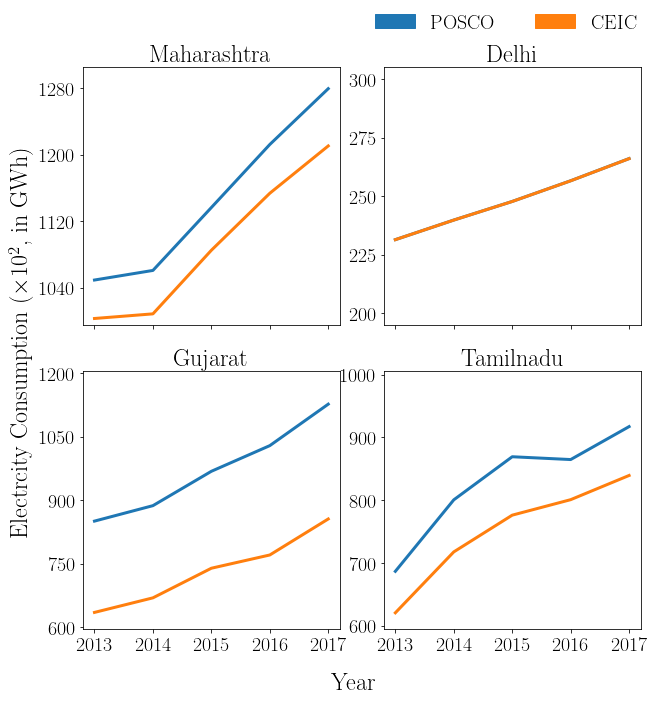

In [3]:
#################################################################################################
  # CODE 8 : State Elctricity Justification  (Four states )
##################################################################################################

# Initilase the figure having two rows and two columns ( four subplots)
fig, axes = plt.subplots(2, 2, figsize=(10,10),  sharex=True)

# Fix the bin size as 4 on y axis.
for ax in axes.flat:
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
    
cities = ['pune','delhi','ahmedabad','chennai']
states = ['MH','DE','GJ','TN']
state_names = ['Maharashtra','Delhi','Gujarat','Tamilnadu']
for number,city in enumerate(cities):
    state = states[cities.index(city)]
    # k and m determine the location of subplots
    k, m = number//2, number % 2

    POSCO_CEIC_csv =  pd.read_excel(f'{state}_POSCO_CEIC.xlsx')
    POSCO_CEIC_actual  = pd.DataFrame(POSCO_CEIC_csv, columns=["Year (y)","POSCO (E_S in GWh)","CEIC (E_S in GWh)"])
    simulated_state_ele_con = POSCO_CEIC_actual['POSCO (E_S in GWh)'].values
    actual_state_ele_con = POSCO_CEIC_actual['CEIC (E_S in GWh)'].values
    print(simulated_state_ele_con)
    print(actual_state_ele_con)

    # slice the original data only upto year 2010 to 2019 to compare with avilable data
   
    POSCO_CEIC_actual['Year (y)'] = POSCO_CEIC_actual['Year (y)'].astype(int)
    POSCO_CEIC_actual['POSCO (E_S in GWh)'] =POSCO_CEIC_actual['POSCO (E_S in GWh)'].multiply(1e-2)
    POSCO_CEIC_actual['CEIC (E_S in GWh)'] = POSCO_CEIC_actual['CEIC (E_S in GWh)'].multiply(1e-2)
    # print(POSCO_CEIC_actual)
    POSCO_CEIC_actual.plot(x="Year (y)", y=["POSCO (E_S in GWh)","CEIC (E_S in GWh)"],linewidth = 3, ax=axes[k, m],legend=False)
     # set y lim by finding min and max value of y axis of particular city.
    if state != 'Delhi':
        mini_value = roundup_floor(min(POSCO_CEIC_actual['POSCO (E_S in GWh)'].min(),POSCO_CEIC_actual['CEIC (E_S in GWh)'].min()))
        maxi_value = roundup_ceil(max(POSCO_CEIC_actual['POSCO (E_S in GWh)'].max(),POSCO_CEIC_actual['CEIC (E_S in GWh)'].max()))                        
    else:
        mini_value = math.floor(min(POSCO_CEIC_actual['POSCO (E_S in GWh)'].min(),POSCO_CEIC_actual['CEIC (E_S in GWh)'].min()))
        maxi_value = math.ceil(max(POSCO_CEIC_actual['POSCO (E_S in GWh)'].max(),POSCO_CEIC_actual['CEIC (E_S in GWh)'].max()))                        
    #     print(state)   
    #     print(mini_value)
    #     print(maxi_value)
    
    # set title of city
    axes[k,m].set_title(state_names[cities.index(city)])
    axes[k,m].set(xlabel=None, ylabel=None)
    axes[k,m].set_ylim(mini_value-5, maxi_value+5)
    print(state)
    y_truth = actual_state_ele_con
    print("posco",y_truth,len(y_truth))
    y_pred = simulated_state_ele_con
    print("ceic",y_pred, len(y_pred))
    from sklearn.metrics import r2_score
    print("Test Score: ",round(r2_score(y_truth, y_pred ),2))
    
# Legend
AE = Patch(color=palt[0], label='POSCO')
SE = Patch(color=palt[1], label='CEIC')

plt.legend(handles=[AE, SE], bbox_to_anchor=(0.9, 2.3),
           borderaxespad=-1.5, ncol=2, frameon=False)

plt.subplots_adjust(left=0.125, wspace=0.17, hspace=0.18, bottom=0.1)
fig.supxlabel('Year')
fig.supylabel('Electrcity Consumption ($\\times 10^2$, in GWh)')
fig.savefig('posco_ceic_states', bbox_inches='tight', pad_inches=0.1, dpi=250)
plt.show()